In [1]:
%run A_load-images.ipynb

Equalization of images with respect to a reference image, using the code from https://github.com/scikit-image/scikit-image/blob/master/skimage/exposure/histogram_matching.py#L22-L70  :

In [2]:
verb = do_verb()

In [3]:
if verb: fnames = ttl.glob()

In [4]:
import numpy as np

from skimage.exposure import match_histograms

def histMatch(sourceImage, templateImage):
    """
    Matches the histogram of sourceImage to the templateImage in order to fix lightness/exposure
    of the sourceImage.
    """
    return match_histograms(sourceImage, templateImage, multichannel=True)

In [5]:
fname_reference = '../orchid/2021-02-14.22:10:07.jpg'
image_reference = ttl.process(fname_reference)

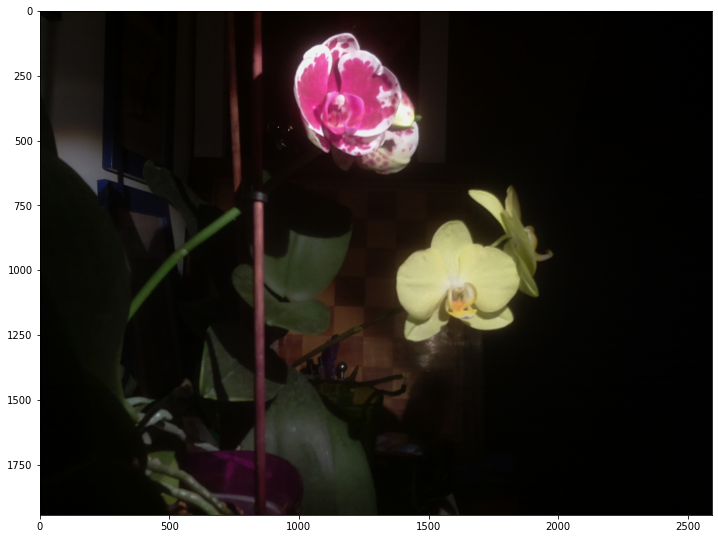

In [6]:
if verb:
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(image_reference, vmin=0, vmax=255);

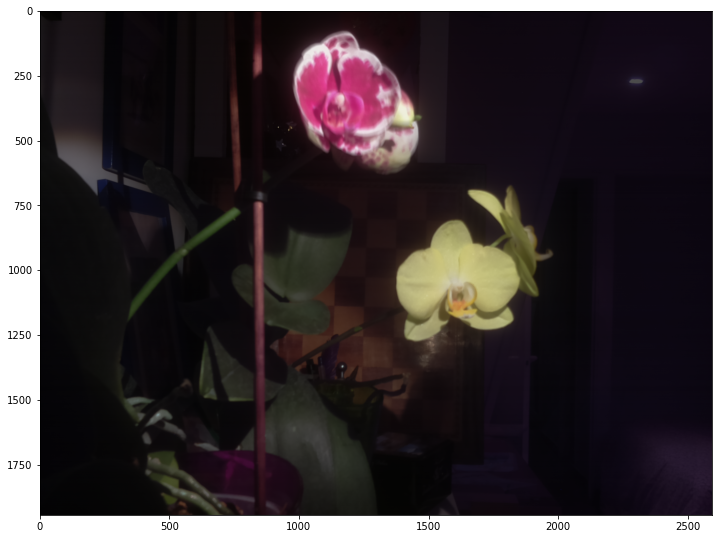

0.0020988677161005243 0.9690140845070422


In [7]:
count = 1
for fname in fnames:
    if '2021-02-14' in fname:
        image_reference += ttl.process(fname)
        count += 1
image_reference /= count
if verb:
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(image_reference)
    plt.show();
    print(image_reference.min(), image_reference.max())

In [8]:
if verb: print(image_reference[0, 0])

[0.02640155 0.02314278 0.01220657]


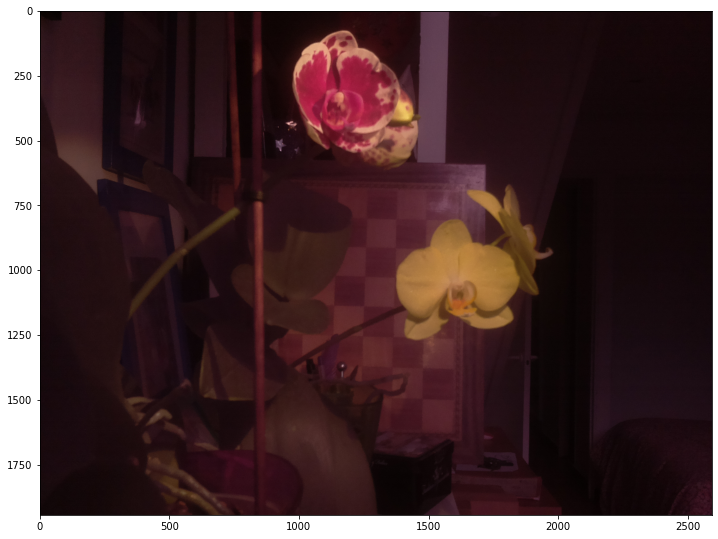

In [9]:
if verb:
    fname_new = '../orchid/2021-02-14.17:30:07.jpg'
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(ttl.process(fname_new));

0.008837337752002204 0.9690140845070422


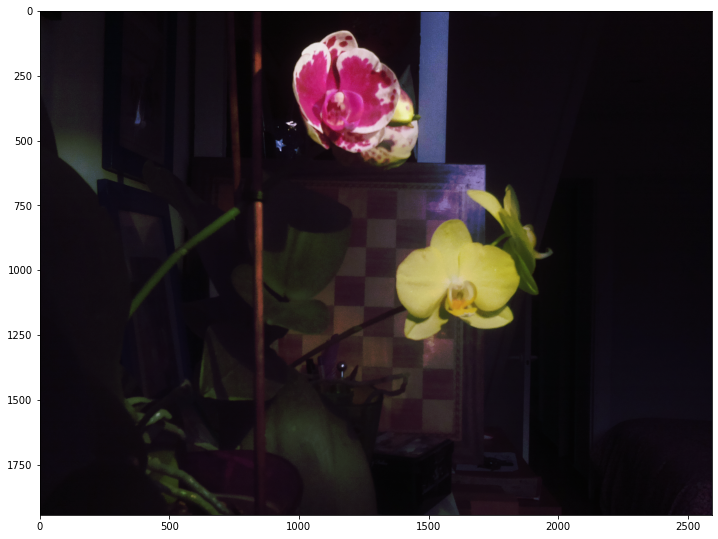

In [10]:
if verb:
    image_matched = histMatch(ttl.process(fname_new), image_reference)
    fig, ax = plt.subplots(figsize=ttl.figsize)
    ax.imshow(image_matched);

    print(image_matched.min(), image_matched.max())